In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [147]:
booking=pd.read_csv("Bookings.csv")
session=pd.read_csv("Sessions.csv")

In [148]:
booking.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        339 non-null    object 
 1   booking_id         339 non-null    object 
 2   from_city          339 non-null    object 
 3   from_country       339 non-null    object 
 4   to_city            339 non-null    object 
 5   to_country         339 non-null    object 
 6   booking_time       339 non-null    object 
 7   device_type_used   339 non-null    object 
 8   INR_Amount         339 non-null    float64
 9   service_name       339 non-null    object 
 10  no_of_passengers   339 non-null    float64
 11  days_to_departure  339 non-null    float64
 12  distance_km        339 non-null    float64
dtypes: float64(4), object(9)
memory usage: 34.6+ KB


In [149]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   session_id             1497 non-null   object
 1   search_id              1497 non-null   object
 2   search_time            1497 non-null   object
 3   session_starting_time  1497 non-null   object
 4   booking_id             366 non-null    object
dtypes: object(5)
memory usage: 58.6+ KB


In [150]:
booking.describe()

,INR_Amount,no_of_passengers,days_to_departure,distance_km
count,339.000000,339.000000,339.000000,339.000000
mean,29327.460708,1.247788,22.348083,4574.309735
std,28148.851152,0.557854,36.412208,3119.033980
min,1402.400000,1.000000,0.000000,206.800000
25%,7237.530000,1.000000,3.000000,1125.800000
50%,23209.600000,1.000000,9.000000,6059.100000
75%,39669.200000,1.000000,24.500000,6867.850000
max,216646.400000,4.000000,311.000000,16520.300000


In [151]:
session.describe()

,session_id,search_id,search_time,session_starting_time,booking_id
count,1497,1497,1497,1497,366
unique,331,1360,1357,333,338
top,session_118,search_569,2020-05-20T13:42:32Z,2018-10-11T12:38:29.186Z,booking_63
freq,70,8,8,70,2


In [152]:
session.isnull().sum()

session_id                  0
search_id                   0
search_time                 0
session_starting_time       0
booking_id               1131
dtype: int64

In [153]:
booking.isnull().sum()

customer_id          0
booking_id           0
from_city            0
from_country         0
to_city              0
to_country           0
booking_time         0
device_type_used     0
INR_Amount           0
service_name         0
no_of_passengers     0
days_to_departure    0
distance_km          0
dtype: int64

In [154]:
session.drop_duplicates(inplace=True)

In [155]:
booking.drop_duplicates(inplace=True)

In [156]:
booking.head()


,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4


In [157]:
session.head()

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN


In [158]:
session.fillna(0, inplace=True)


In [159]:
session.head(20)

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,0
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,0
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,0
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,0
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,0
5,session_322,search_506,2020-01-21T21:10:58.482Z,2020-01-21T21:10:12Z,booking_54
6,session_283,search_880,2020-01-21T05:33:48.061Z,2020-01-21T05:33:33.559Z,booking_106
7,session_194,search_312,2019-09-05T09:04:40.423Z,2019-09-05T09:04:32Z,booking_1
8,session_52,search_1227,2020-01-20T16:54:07.232Z,2020-01-20T16:53:47.477Z,0
9,session_52,search_1110,2020-01-20T17:03:52.145Z,2020-01-20T16:53:47.477Z,booking_282


In [160]:
unique_ids = session['booking_id'].unique()
for uid in unique_ids:
    if uid != 0:
        session['booking_id'].replace(uid, 1, inplace=True)

In [161]:
session.head(20)

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,0
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,0
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,0
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,0
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,0
5,session_322,search_506,2020-01-21T21:10:58.482Z,2020-01-21T21:10:12Z,1
6,session_283,search_880,2020-01-21T05:33:48.061Z,2020-01-21T05:33:33.559Z,1
7,session_194,search_312,2019-09-05T09:04:40.423Z,2019-09-05T09:04:32Z,1
8,session_52,search_1227,2020-01-20T16:54:07.232Z,2020-01-20T16:53:47.477Z,0
9,session_52,search_1110,2020-01-20T17:03:52.145Z,2020-01-20T16:53:47.477Z,1


In [162]:
session['search_time'] = pd.to_datetime(session['search_time'], format='ISO8601')
session['session_starting_time'] = pd.to_datetime(session['session_starting_time'], format='ISO8601')



In [163]:
booking['booking_time'] = pd.to_datetime(booking['booking_time'], format='ISO8601')


In [164]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   customer_id        339 non-null    object             
 1   booking_id         339 non-null    object             
 2   from_city          339 non-null    object             
 3   from_country       339 non-null    object             
 4   to_city            339 non-null    object             
 5   to_country         339 non-null    object             
 6   booking_time       339 non-null    datetime64[ns, UTC]
 7   device_type_used   339 non-null    object             
 8   INR_Amount         339 non-null    float64            
 9   service_name       339 non-null    object             
 10  no_of_passengers   339 non-null    float64            
 11  days_to_departure  339 non-null    float64            
 12  distance_km        339 non-null    float64        

In [165]:
session['session_id'] = session['session_id'].str.split('_').str[1].astype(int)

session['search_id'] = session['search_id'].str.split('_').str[1].astype(int)

In [166]:
booking['customer_id'] = booking['customer_id'].str.split('_').str[1].astype(int)

booking['booking_id'] = booking['booking_id'].str.split('_').str[1].astype(int)

In [167]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   customer_id        339 non-null    int64              
 1   booking_id         339 non-null    int64              
 2   from_city          339 non-null    object             
 3   from_country       339 non-null    object             
 4   to_city            339 non-null    object             
 5   to_country         339 non-null    object             
 6   booking_time       339 non-null    datetime64[ns, UTC]
 7   device_type_used   339 non-null    object             
 8   INR_Amount         339 non-null    float64            
 9   service_name       339 non-null    object             
 10  no_of_passengers   339 non-null    float64            
 11  days_to_departure  339 non-null    float64            
 12  distance_km        339 non-null    float64        

In [168]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   customer_id        339 non-null    int64              
 1   booking_id         339 non-null    int64              
 2   from_city          339 non-null    object             
 3   from_country       339 non-null    object             
 4   to_city            339 non-null    object             
 5   to_country         339 non-null    object             
 6   booking_time       339 non-null    datetime64[ns, UTC]
 7   device_type_used   339 non-null    object             
 8   INR_Amount         339 non-null    float64            
 9   service_name       339 non-null    object             
 10  no_of_passengers   339 non-null    float64            
 11  days_to_departure  339 non-null    float64            
 12  distance_km        339 non-null    float64        

In [169]:
session.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1405 entries, 0 to 1496
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   session_id             1405 non-null   int64              
 1   search_id              1405 non-null   int64              
 2   search_time            1405 non-null   datetime64[ns, UTC]
 3   session_starting_time  1405 non-null   datetime64[ns, UTC]
 4   booking_id             1405 non-null   int64              
dtypes: datetime64[ns, UTC](2), int64(3)
memory usage: 65.9 KB


In [170]:
session.head()

,session_id,search_id,search_time,session_starting_time,booking_id
0,322,784,2020-01-21 21:35:38.910000+00:00,2020-01-21 21:10:12+00:00,0
1,322,776,2020-01-21 21:37:37.697000+00:00,2020-01-21 21:10:12+00:00,0
2,322,623,2020-01-21 21:36:11.392000+00:00,2020-01-21 21:10:12+00:00,0
3,322,270,2020-01-21 21:16:07.685000+00:00,2020-01-21 21:10:12+00:00,0
4,322,905,2020-01-21 21:34:55.673000+00:00,2020-01-21 21:10:12+00:00,0


In [171]:
session.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1405 entries, 0 to 1496
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   session_id             1405 non-null   int64              
 1   search_id              1405 non-null   int64              
 2   search_time            1405 non-null   datetime64[ns, UTC]
 3   session_starting_time  1405 non-null   datetime64[ns, UTC]
 4   booking_id             1405 non-null   int64              
dtypes: datetime64[ns, UTC](2), int64(3)
memory usage: 65.9 KB


In [172]:
bookings_per_customer = booking.groupby('customer_id')['booking_id'].nunique()


In [173]:
print(bookings_per_customer)

customer_id
0      1
1      1
2      1
3      1
4      1
      ..
301    1
302    1
303    1
304    1
305    1
Name: booking_id, Length: 306, dtype: int64


In [174]:
customers_with_multiple_bookings = bookings_per_customer[bookings_per_customer > 1].count()

In [175]:
print(customers_with_multiple_bookings)

26


**Find the number of distinct bookings, sessions, and searches from the given datasets.**

In [176]:
num_distinct_bookings = booking['booking_id'].nunique()
num_distinct_sessions = session['session_id'].nunique()
num_distinct_searches = session['search_id'].nunique()

print(f"Number of distinct bookings: {num_distinct_bookings}")
print(f"Number of distinct sessions: {num_distinct_sessions}")
print(f"Number of distinct searches: {num_distinct_searches}")

Number of distinct bookings: 339
Number of distinct sessions: 331
Number of distinct searches: 1360


**How many sessions have more than one booking**

In [187]:
bookings_per_session = session.groupby('session_id')['booking_id'].nunique()
sessions_booking = bookings_per_session[bookings_per_session > 1].count()

print(f"Sessions with more than one booking: {sessions_booking}")

Sessions with more than one booking: 224


**Which days of the week have the highest number of bookings? Also, draw a pie chart to
show the distribution for all days of the week**

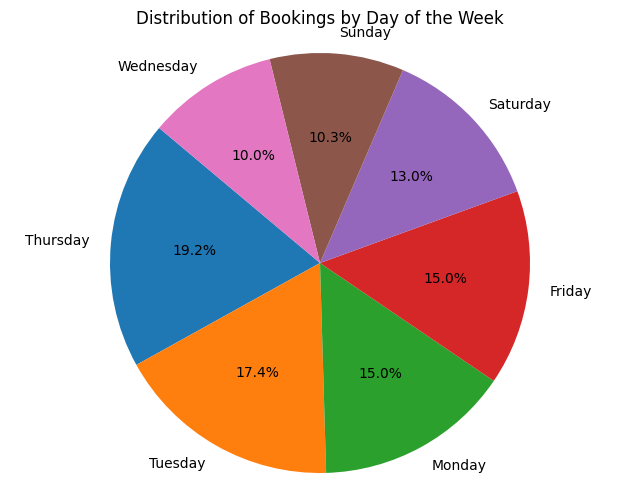

In [178]:
import matplotlib.pyplot as plt

booking['day_of_week'] = booking['booking_time'].dt.day_name()
bookings_by_day = booking['day_of_week'].value_counts()


plt.figure(figsize=(8, 6))
plt.pie(bookings_by_day, labels=bookings_by_day.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Bookings by Day of the Week')
plt.axis('equal')
plt.show()

 **For each of the service names, display the total number of bookings and the total Gross
Booking Value in INR**

In [179]:
service_summary = booking.groupby('service_name').agg(
    total_bookings=('booking_id', 'count'),
    total_gbv=('INR_Amount', 'sum')
).reset_index()

print(service_summary)

  service_name  total_bookings   total_gbv
0      GOIBIBO             186  5897637.97
1          MMT              48   665669.08
2        YATRA             105  3378702.13


**For customers who have more than 1 booking, which is the most booked route
(from_city to to_city)?**

In [180]:
customer_booking_counts = booking.groupby('customer_id').size()
customers_with_multiple_bookings = customer_booking_counts[customer_booking_counts > 1].index

filtered_bookings = booking[booking['customer_id'].isin(customers_with_multiple_bookings)]

route_counts = filtered_bookings.groupby(['from_city', 'to_city']).size().reset_index(name='count')


most_booked_route = route_counts.sort_values(by='count', ascending=False).iloc[0]

print(f"The most booked route for customers with more than one booking is from {most_booked_route['from_city']} to {most_booked_route['to_city']} with {most_booked_route['count']} bookings.")

The most booked route for customers with more than one booking is from Gurgaon to Roissy-en-France with 5 bookings.


**Which are the top 3 departure cities from where customers book mostly in advance,
provided that there have been at least 5 departures from that city?**

In [181]:
city_departure_counts = booking['from_city'].value_counts()
cities_with_at_least_5_departures = city_departure_counts[city_departure_counts >= 5].index

filtered_bookings = booking[booking['from_city'].isin(cities_with_at_least_5_departures)]
avg_days_to_departure = filtered_bookings.groupby('from_city')['days_to_departure'].mean().reset_index()


sorted_avg_days = avg_days_to_departure.sort_values(by='days_to_departure', ascending=False)

top_3_cities = sorted_avg_days.head(3)

print("Top 3 departure cities where customers book mostly in advance:")
print(top_3_cities)

Top 3 departure cities where customers book mostly in advance:
    from_city  days_to_departure
1     Bālāpur          46.166667
4  Devanhalli          29.583333
2     Chennai          26.187500


**Plot a heatmap displaying correlations of the numerical column and report which pair
of numerical columns in the bookings dataset, have the maximum correlation?**

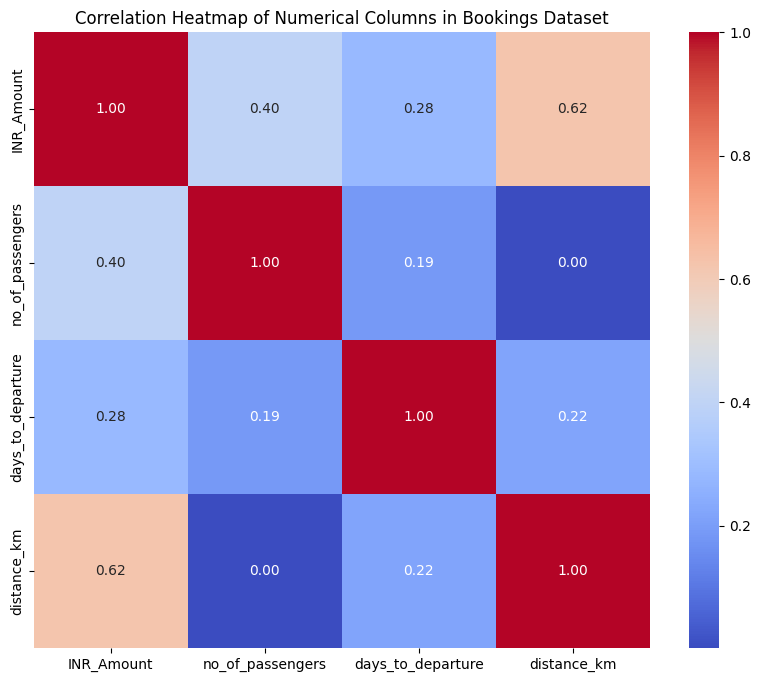

The pair of numerical columns with the maximum correlation:
INR_Amount  INR_Amount    1.0
dtype: float64


In [182]:
import seaborn as sns


numerical_columns = ['INR_Amount', 'no_of_passengers', 'days_to_departure', 'distance_km']


correlation_matrix = booking[numerical_columns].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, fmt='.2f', annot_kws={'size': 10})
plt.title('Correlation Heatmap of Numerical Columns in Bookings Dataset')
plt.show()

max_corr_pair = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates().head(1)
print(f"The pair of numerical columns with the maximum correlation:")
print(max_corr_pair)

**For each service, which is the most used device type for making bookings on the
platform?**

In [183]:

device_usage = booking.groupby(['service_name', 'device_type_used']).size().reset_index(name='count')

most_used_device_per_service = device_usage.loc[device_usage.groupby('service_name')['count'].idxmax()]

print("Most used device type for each service:")
print(most_used_device_per_service)

Most used device type for each service:
  service_name device_type_used  count
2      GOIBIBO              IOS     70
5          MMT          Desktop     30
9        YATRA          Desktop     51


**Plot the trends at a quarterly frequency for the number of bookings by each of the
device types, that is, plot a time series for each year and quarter showing the number
of bookings performed by each device type**

<ipython-input-184-28d0ee4425b6>:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  booking['quarter'] = booking['booking_time'].dt.to_period('Q').astype(str)


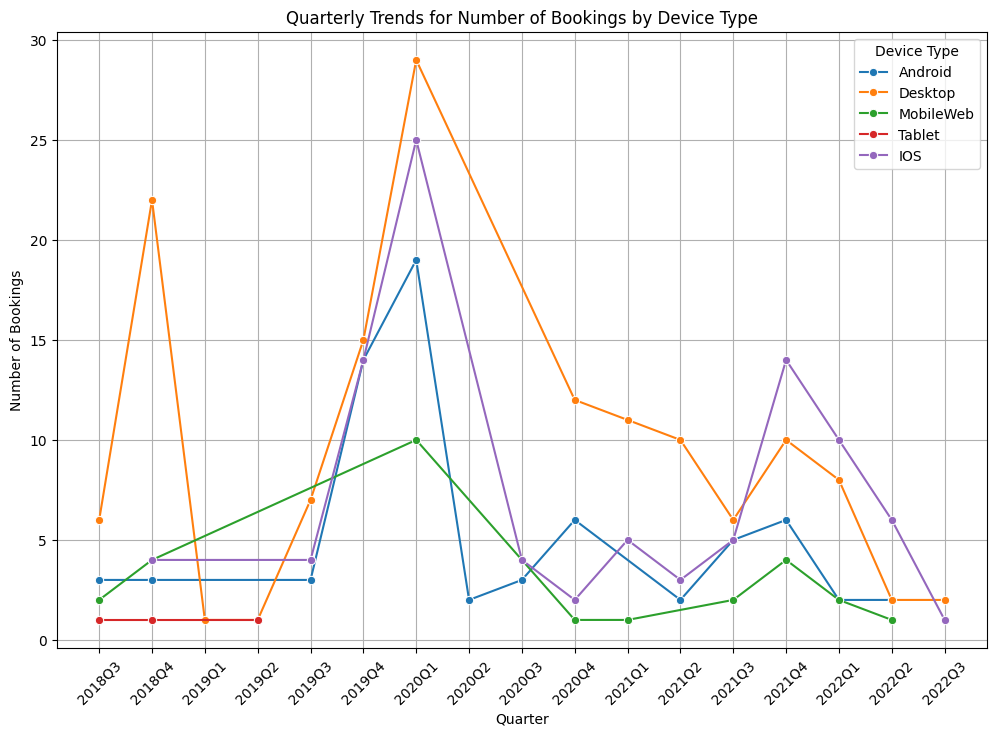

In [184]:
booking['booking_time'] = pd.to_datetime(booking['booking_time'], utc=True)


booking['year'] = booking['booking_time'].dt.year
booking['quarter'] = booking['booking_time'].dt.to_period('Q').astype(str)

quarterly_bookings = booking.groupby(['year', 'quarter', 'device_type_used']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))
sns.lineplot(data=quarterly_bookings, x='quarter', y='count', hue='device_type_used', marker='o')
plt.title('Quarterly Trends for Number of Bookings by Device Type')
plt.xlabel('Quarter')
plt.ylabel('Number of Bookings')
plt.legend(title='Device Type')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**Consider the following example:12 customers performed a total of 100 searches but
 only a few of them performed 10 bookings in total.
searches=100 bookings=10 customers=12
The overall booking to search ratio, Ober, is 10/100 = 0.1 Using the above
information/context, answer the following:
• What is the average oBSR for each month of the year?
• What is the average oBSR for each day of the week?
• Plot a time series of oBSR on all the given dates.**

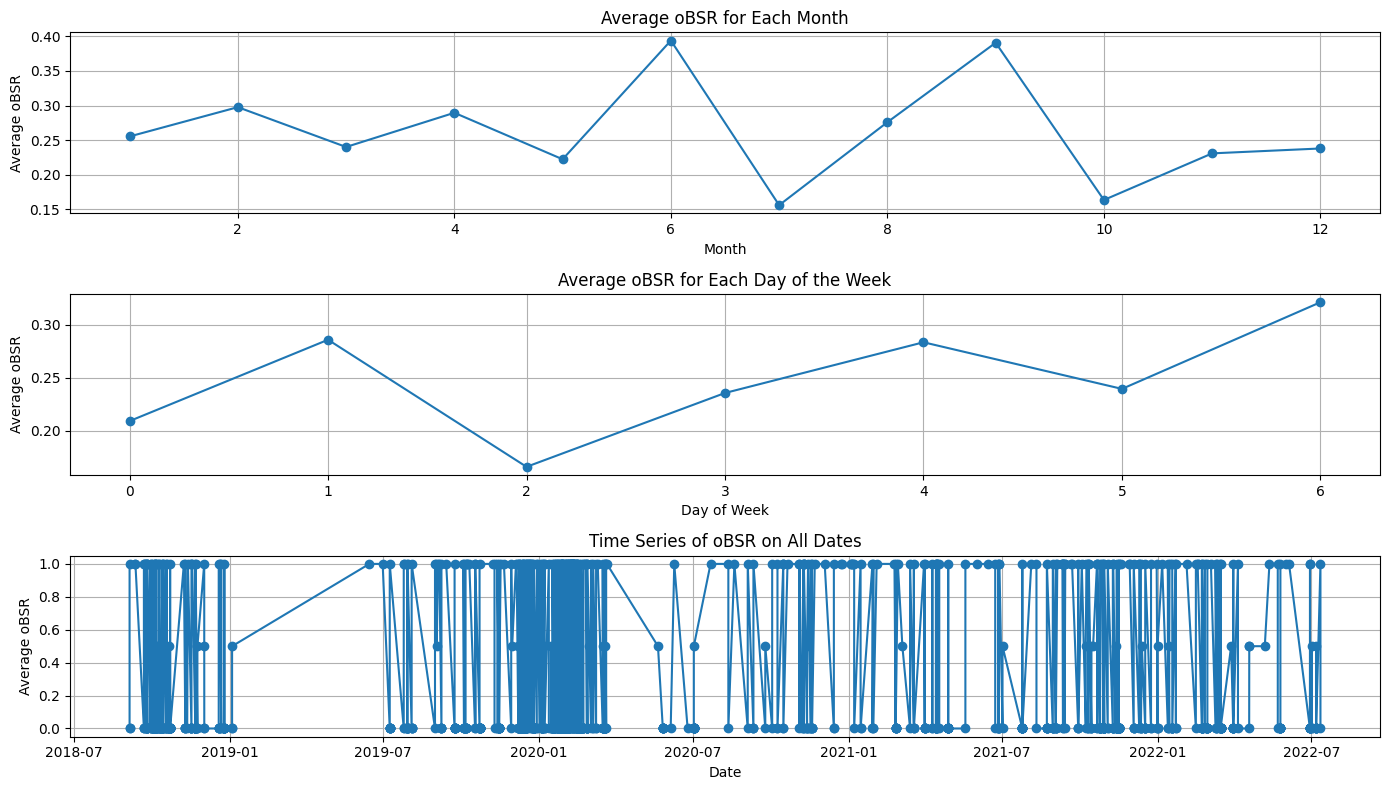

In [185]:
session['search_time'] = pd.to_datetime(session['search_time'], utc=True)

session['is_booking'] = session['booking_id'].apply(lambda x: 1 if x > 0 else 0)

session['month'] = session['search_time'].dt.month
monthly_obSR = session.groupby('month')['is_booking'].mean().reset_index(name='avg_oBSR')

session['day_of_week'] = session['search_time'].dt.dayofweek
weekly_obSR = session.groupby('day_of_week')['is_booking'].mean().reset_index(name='avg_oBSR')

daily_obSR = session.groupby('search_time')['is_booking'].mean().reset_index(name='avg_oBSR')

plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(monthly_obSR['month'], monthly_obSR['avg_oBSR'], marker='o')
plt.title('Average oBSR for Each Month')
plt.xlabel('Month')
plt.ylabel('Average oBSR')
plt.grid(True)


plt.subplot(3, 1, 2)
plt.plot(weekly_obSR['day_of_week'], weekly_obSR['avg_oBSR'], marker='o')
plt.title('Average oBSR for Each Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Average oBSR')
plt.grid(True)


plt.subplot(3, 1, 3)
plt.plot(daily_obSR['search_time'], daily_obSR['avg_oBSR'], marker='o')
plt.title('Time Series of oBSR on All Dates')
plt.xlabel('Date')
plt.ylabel('Average oBSR')
plt.grid(True)

plt.tight_layout()
plt.show()